# Entrega 1 - Aprendiz de damas chinas

### Grupo 13:
     - J. Aguirre  C.I: 4.773.509-6
     - A. Collazo C.I...
     - G. Núnez C.I: 4.785.081-2



## 1. Objetivo

El principal objetivo de esta tarea es construir un jugador que aprenda a jugar a las damas chinas siguendo los lineamientos expuestos en el capítulo 1 del libro del curso.
    
El éxito del aprendizaje se medirá a través de la cantidad de partidas ganadas sobre un total de partidas jugadas previamente configurado.
    
El conjunto de entrenamiento será el resultado de las partidas jugadas ante dos tipos de adversarios: un jugador aleatorio, y un jugador que conforma una versión anterior del propio aprendiz.
   
Para valorar el aprendizaje se definirá una función objetivo cuyo resultado será un valor numérico que será más alto para aquellos tableros que sean más promisorios. Dicha función estará implementada a partir de una representación del tablero convenientemente elegida, a los efectos de aprender a jugar y conseguir mayor porcentaje de victorias a través de la experiencia.

En el presente informe se describirá la solución obtenida, se mostrarán los resultados obtenidos y se explicará el por qué de los mismos.


## 2. Diseño

En la siguiente sección se mencionan las decisiones de diseño utilizadas en los distintos aspectos del juego, la representación lógica del tablero, los algoritmos utilizados para la implementación del aprendiz y la construcción de los jugadores oponentes.  


## 2.1 Juego
### 2.1.1 Reglas
Las reglas utilizadas para el juego son las mismas que se aplican en el juego de las damas chinas convencional a excepción de las siguientes simplificaciones:
* Dado que las partidas son siempre de dos jugadores el tablero fue simplificado, omitiendo cuatro de las seis puntas de la estrella. Por lo tanto el tablero resultante está formado por un hexágono de nueve casilleros de largo, y dos triángulos opuestos, de largo cuatro casilleros cada uno.
* Una vez que una ficha alcanza su triángulo objetivo, la misma no podrá realizar movimientos hacia atrás en el tablero. Esta decisión fue tomada para que el jugador randómico no saque fichas de las posiciones ganadoras.
* Se limita a poder realizar un único salto por jugada. (AGREGAR LA JUSTIFICACION)
* Se define un número máximo de jugadas realizadas por ambos jugadores durante todo el partido. En caso de que el jugador aprendiz no sea capaz de vencer a su oponente en menos de X_(PONER CUANTAS) jugadas, el partido será computado como perdido para el jugador aprendiz.


## 2.2 Tablero
Con el objetivo de contabilizar el grado de avance de las fichas (de cada jugador), el tablero fue particionado en cinco regiones lógicas: las fichas en posición inicial, en posición lejana del triángulo objetivo, las que están a mitad de camino, las cercanas al triángulo objetivo y finalmente las fichas en posición ganadora. Todas las regiones son de largo tres casilleros a excepción de la primer y última región que tienen largo cuatro cada una.
A partir de esto, se define la representación del tablero como una tupla de diez valores, donde cada valor representa la cantidad de fichas de cada jugador en: (región inicial, región lejana, región media, región cercana, región ganadora).

En las figuras 2.1 y 2.2 se muestran dos ejemplos de posibles tableros con sus respectivas tuplas que los representan. (PONER IMAGENES DE TABLEROS CON FICHAS EN DISTINTAS POSICIONES Y LA TUPLA CORRESPONDIENTE A ESA SITUACION) 



## 2.3 Algoritmo
La función de valoración es una función partida en tres rangos:
- Cuando la cantidad de fichas en posición ganadora del jugador 1 es 10, la función vale 1.
- Cuando la cantidad de fichas en posición ganadora del jugador 2 es 10, la función vale -1.
- En el resto de los tableros, la función se representa como combinación lineal de los valores de los atributos que representan al tablero.
Cada una de las variables está multiplicada por una ponderación que representa la relevancia del valor del atributo en la estrategia de juego.
El dominio de la funcion de valoración está definida en todos los reales entre -1 y 1 (VER ESTO PORQUE NO ES LO QUE SE ESTÁ DEVOLVIENDO).

Los función se ajusta siguiendo el algoritmo LMS al término de una cantidad de partidas dada. Dicha cantidad de partidos es configurable en el sentido de que se debe ingresar un parámetro que indique cada cuantos partidos se deben ajustar los pesos. El vector de pesos obtenido es normalizdo por su norma de manera tal que el valor de cada uno de ellos se mantiene en el rango entre -1 y 1.
En la sección tal.tanto se tabulan los resultados obtenidos ajustando la función de valoración cada w, x e y partidos jugados.

El ajuste de los pesos está afectado por una factor de aprendizaje ($\mu$).
Dicho factor de aprendizaje se ajusta según el error relativo incurrido en una muestra de entrenamiento (error de una partida, o promedio de error de n partidas del conjunto). En la tabla 2.1 se visualizan algunos de los valores de $\mu$ obtenidos.

- ¿Se utiliza enfriamiento? ¿cómo? (VER ESTE PUNTO)
El factor de aprendizaje está categorizada en tres: 'bueno', 'regular', 'malo'. Dependiendo del error relativo cometido, se define el grado de ajuste del parámetro: 0,03, 0,06 y 0,09 respectivamente.


Tal vez precisen agregar algo de pseudocódigo o código para ejemplificar:

```python
    def f(x):
        return x
```

## 2.4 Contrarios
Se definen dos tipos de jugadores oponentes:
* Un jugador que elige sus movimientos al azar
* Un jugador que constituye una versión previa del jugador aprendiz actual.

### 2.4.1 Jugador azaroso
Las jugadas se eligen de forma aleatoria sobre un subconjunto de jugadas válidas para cierta ficha (elegida también de forma aleatoria). Como se mencionó anteriormente, una vez que una ficha alcanza la región ganadora se limita a que únicamente avance (en caso de ser posible) para llenar el triángulo del adversario e impedir que retire las fichas de dicha región.
En caso de que no haya movimiento disponible para la ficha elegida, se selecciona otra elegida nuevamente al azar (notar que eventualmente podría llegar a ser la misma).

### 2.4.2 Versión previa del aprendiz actual
En primera instancia este jugador utiliza los pesos iniciales que tenía nuestro aprendiz ante su adversario azaroso, y el jugador aprendiz utilizará los pesos que obtuvo al terminar la última partida de entrenamiento ante el oponente aleatorio. Luego el jugador aprendiz actualiza los pesos conforme al parámetro ingresado que marca la cantidad de partidos que deben transcurrir para que este vuelva a ajustar los pesos. Una vez que el jugador aprendiz actualiza los nuevos pesos, la versión previa configurará como sus pesos actuales, los pesos que tenía el aprendiz hasta antes de actualizarlos por los nuevos.
(NO SE SI ESTO ES REALMENTE ASI, LO PUSE PARA REDACTAR ALGO)

## 3. Experimentación

A continuación se presentan los resultados obtenidos durante el proceso de aprendizaje.
- Presentar los distintos experimentos que se realizan y los resultados que se obtienen.

- La información de los resultados se presenta en tablas y en gráficos, de acuerdo a su naturaleza. Por ejemplo:

_En la gráfica 1, se observa el error cuadrático total del conjunto de entrenamiento a medida que pasan los juegos para el oponente X_

## 3.1 Fase de entrenamiento vs el jugador azaroso

## 3.2 Fase de entrenamiento vs la versión previa del aprendiz actual

## 3.3 Competencia entre los jugadores obtenidos durante las fases de entrenamiento

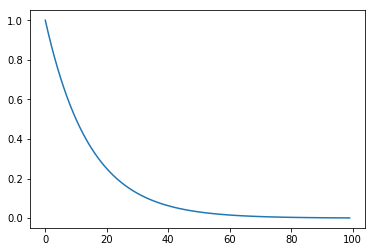

In [2]:
import matplotlib.pyplot
matplotlib.pyplot.plot(range(0,100), [2**-(x/10) for x in range(0,100)])


- Debe existir alguna instancia donde se compile la información relevante de los experimentos de forma de poder comparar fácilmente los distintos experimentos. Por ejemplo:

_En la tabla 1, se presentan los distintos resultados contra el jugador aleatorio, para los distintos valores de $\alpha$ elegidos. El mejor resultado se obtiene para $\alpha=0.05$, lo que prueba que la estrategia..._

<table>
  <tr>
    <th>$\mu$</th>
    <th>...</th>
    <th>Turnos</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>...</td>
    <td>100</td>
    <td>0.991</td>
  </tr>    
  <tr>
    <td>0.005</td>
    <td>...</td>
    <td>100</td>
    <td>0.987</td>
  </tr>
  <tr style="font-weight:bold">
    <td>0.05</td>
    <td>...</td>
    <td>100</td>
    <td>0.329</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>...</td>
    <td>100</td>
    <td>0.564</td>
  </tr>    
    <caption>Tabla 1 - Entrenamiento del jugador X para distintos valores de $\alpha$</caption>
</table>


## 4. Conclusión

Una breve conclusión del trabajo realizado. Por ejemplo: 
- ¿cuándo se dieron los mejores resultados del jugador?
- ¿encuentra alguna relación con los parámetros / oponentes/ atributos elegidos?
- ¿cómo mejoraría los resultados?